# Data Exploration

In [1]:
%matplotlib widget

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import rcParams
import shutil

# Enable LaTeX fonts only if TeX is available
if shutil.which("latex"):
    rcParams['text.usetex'] = True
    rcParams['font.family'] = 'serif'
else:
    print("LaTeX not found — using default matplotlib fonts.")

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries loaded successfully!")

Libraries loaded successfully!


In [3]:
# Load the main datasets we need
orders = pd.read_csv('../data/raw/olist_orders_dataset.csv')
order_items = pd.read_csv('../data/raw/olist_order_items_dataset.csv')

print("Datasets loaded successfully!")
print("\nOrders shape:", orders.shape)
print("Order items shape:", order_items.shape)

Datasets loaded successfully!

Orders shape: (99441, 8)
Order items shape: (112650, 7)


In [4]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [5]:
# Check columns in orders dataset
print("ORDERS columns:")
print(orders.columns.tolist())
print("\n")

# Check first few rows
print("First 3 rows of ORDERS:")
orders.head(3)

ORDERS columns:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']


First 3 rows of ORDERS:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [6]:
# Check columns in order_items dataset
print("ORDER ITEMS columns:")
print(order_items.columns.tolist())
print("\n")

# Check first few rows
print("First 3 rows of ORDER ITEMS:")
order_items.head(3)

ORDER ITEMS columns:
['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']


First 3 rows of ORDER ITEMS:


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [7]:
# Merge orders with order_items to get pricing information
orders_with_items = orders.merge(order_items, on='order_id', how='inner')

print("Merged dataset shape:", orders_with_items.shape)
print("\nFirst 3 rows:")
orders_with_items.head(3)

Merged dataset shape: (112650, 14)

First 3 rows:


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.90,19.22


In [8]:
# Calculate total order value (price + shipping) for each item
orders_with_items['total_value'] = orders_with_items['price'] + orders_with_items['freight_value']

# Calculate summary statistics
print("PRICE STATISTICS:")
print("Mean price:", orders_with_items['price'].mean())
print("Median price:", orders_with_items['price'].median())
print("Min price:", orders_with_items['price'].min())
print("Max price:", orders_with_items['price'].max())

print("\n")

print("SHIPPING COST STATISTICS:")
print("Mean shipping:", orders_with_items['freight_value'].mean())
print("Median shipping:", orders_with_items['freight_value'].median())
print("Min shipping:", orders_with_items['freight_value'].min())
print("Max shipping:", orders_with_items['freight_value'].max())

print("\n")

print("TOTAL ORDER VALUE STATISTICS:")
print("Mean total:", orders_with_items['total_value'].mean())
print("Median total:", orders_with_items['total_value'].median())

PRICE STATISTICS:
Mean price: 120.65373901464714
Median price: 74.99
Min price: 0.85
Max price: 6735.0


SHIPPING COST STATISTICS:
Mean shipping: 19.990319928983578
Median shipping: 16.26
Min shipping: 0.0
Max shipping: 409.68


TOTAL ORDER VALUE STATISTICS:
Mean total: 140.6440589436307
Median total: 92.32000000000001



Orders below 100 BRL: 72165
Orders above 100 BRL: 40485
Percentage above 100 BRL: 35.938748335552596


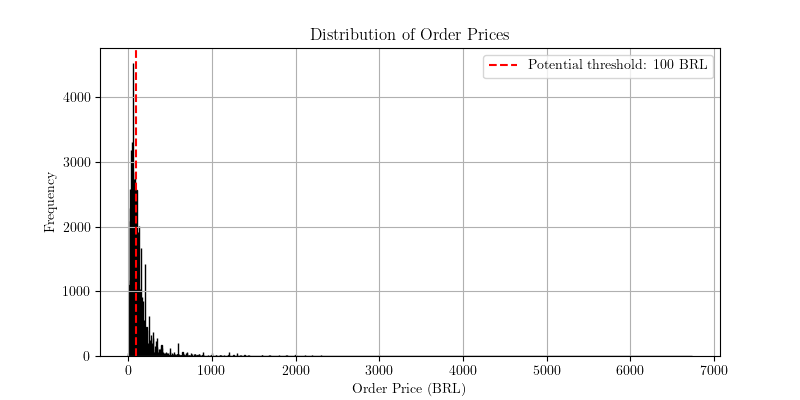

In [9]:
# Create a simple histogram of order prices
plt.figure(figsize=(8, 4))
plt.hist(orders_with_items['price'], bins=5000, edgecolor='black')
plt.xlabel('Order Price (BRL)')
plt.ylabel('Frequency')
plt.title('Distribution of Order Prices')
plt.axvline(x=100, color='red', linestyle='--', label='Potential threshold: 100 BRL')
plt.legend()
plt.grid()
# plt.xlim(0,1000)
plt.savefig("./../results/figures/item_price_distribution_with_threshold.png", dpi = 300, bbox_inches='tight')
# plt.show()

# Count orders above and below 100 BRL threshold
orders_below_100 = (orders_with_items['price'] < 100).sum()
orders_above_100 = (orders_with_items['price'] >= 100).sum()

print("\nOrders below 100 BRL:", orders_below_100)
print("Orders above 100 BRL:", orders_above_100)
print("Percentage above 100 BRL:", (orders_above_100 / len(orders_with_items)) * 100)

In [10]:
# Group by order_id to get total per order
order_totals = orders_with_items.groupby('order_id').agg(
    total_price=('price', 'sum'),
    total_shipping=('freight_value', 'sum'),
    num_items=('order_item_id', 'count')
).reset_index()

# Calculate combined total
order_totals['order_total'] = order_totals['total_price'] + order_totals['total_shipping']

print("Order-level dataset shape:", order_totals.shape)
print("\nFirst 5 orders:")
print(order_totals.head())

print("\n")
print("ORDER LEVEL STATISTICS:")
print("Mean order price:", order_totals['total_price'].mean())
print("Median order price:", order_totals['total_price'].median())
print("Mean order total (price + shipping):", order_totals['order_total'].mean())
print("Median order total:", order_totals['order_total'].median())

Order-level dataset shape: (98666, 5)

First 5 orders:
                           order_id  total_price  total_shipping  num_items  \
0  00010242fe8c5a6d1ba2dd792cb16214        58.90           13.29          1   
1  00018f77f2f0320c557190d7a144bdd3       239.90           19.93          1   
2  000229ec398224ef6ca0657da4fc703e       199.00           17.87          1   
3  00024acbcdf0a6daa1e931b038114c75        12.99           12.79          1   
4  00042b26cf59d7ce69dfabb4e55b4fd9       199.90           18.14          1   

   order_total  
0        72.19  
1       259.83  
2       216.87  
3        25.78  
4       218.04  


ORDER LEVEL STATISTICS:
Mean order price: 137.7540763788945
Median order price: 86.9
Mean order total (price + shipping): 160.57763809214927
Median order total: 105.29



At ORDER level:
Orders below 100 BRL: 57707
Orders above 100 BRL: 40959
Percentage above 100 BRL: 41.51278049176008


Mean shipping cost: 22.823561713254815


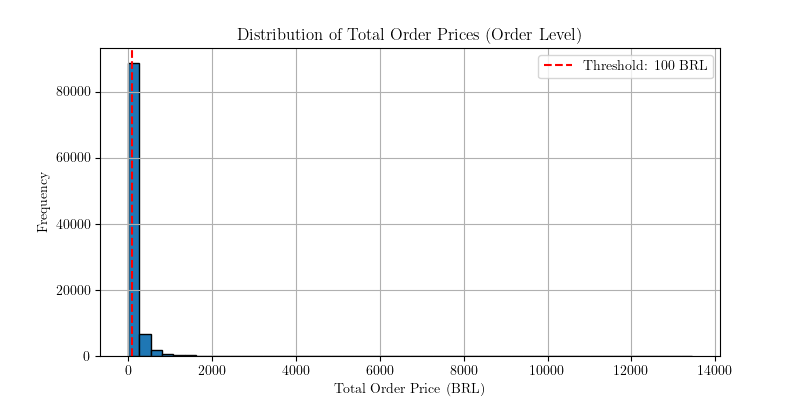

In [11]:
# Visualize order-level price distribution
plt.figure(figsize=(8, 4))
plt.hist(order_totals['total_price'], bins=50, edgecolor='black')
plt.xlabel('Total Order Price (BRL)')
plt.ylabel('Frequency')
plt.title('Distribution of Total Order Prices (Order Level)')
plt.axvline(x=100, color='red', linestyle='--', label='Threshold: 100 BRL')
plt.legend()
plt.grid()
plt.savefig("./../results/figures/order_price_distribution_with_threshold.png", dpi = 300, bbox_inches='tight')
# plt.show()

# Count orders above and below threshold
orders_below = (order_totals['total_price'] < 100).sum()
orders_above = (order_totals['total_price'] >= 100).sum()
percentage_above = (orders_above / len(order_totals)) * 100

print("\nAt ORDER level:")
print("Orders below 100 BRL:", orders_below)
print("Orders above 100 BRL:", orders_above)
print("Percentage above 100 BRL:", percentage_above)

print("\n")
print("Mean shipping cost:", order_totals['total_shipping'].mean())

In [12]:
# Save the order-level data for next notebooks
order_totals.to_csv('../data/processed/order_totals.csv', index=False)
print("Data saved successfully!")
print("\nDataset contains", len(order_totals), "orders")

Data saved successfully!

Dataset contains 98666 orders
